In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from scipy.stats import zscore
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PowerTransformer
    from sklearn.model_selection import cross_val_score
    import joblib
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/Anish G/Downloads/New folder/HR Employee Attrition.csv"
df=pd.read_csv(path)
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Above details shows the  dataset being imported

In [3]:
pd.set_option("display.max_rows",None)

The above code is used to show the whole details

In [4]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

All columns in dataset

In [6]:
df=pd.DataFrame(data=df)

In [7]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We have both object and integer type values in all columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Shows number of rows,null values and datatypes

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see there are no null values in any columns

<AxesSubplot:>

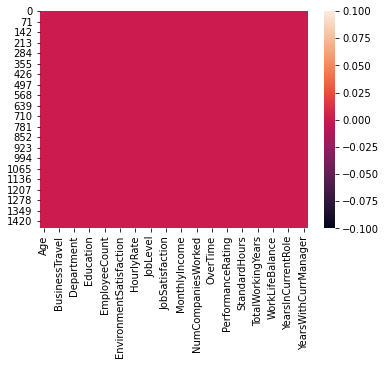

In [11]:
sns.heatmap(df.isnull())

The above heat map shows there are no null values

In [12]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

The above data shows standard devation,Mean,Count,25%percentile,50%percentile,75%percentile,minimum value and maximum value

In [13]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

We can see there are two types of values in target variable

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Total number of Yes and No values in target variable

<AxesSubplot:xlabel='Attrition', ylabel='count'>

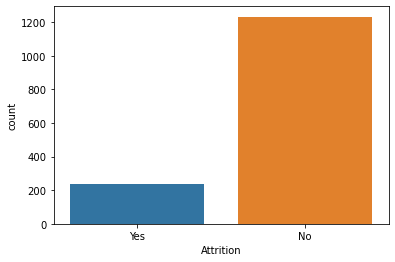

In [15]:
sns.countplot(df["Attrition"])

we have 2 classes and are not eqalily distributed,there is class imbalance issue 

<AxesSubplot:>

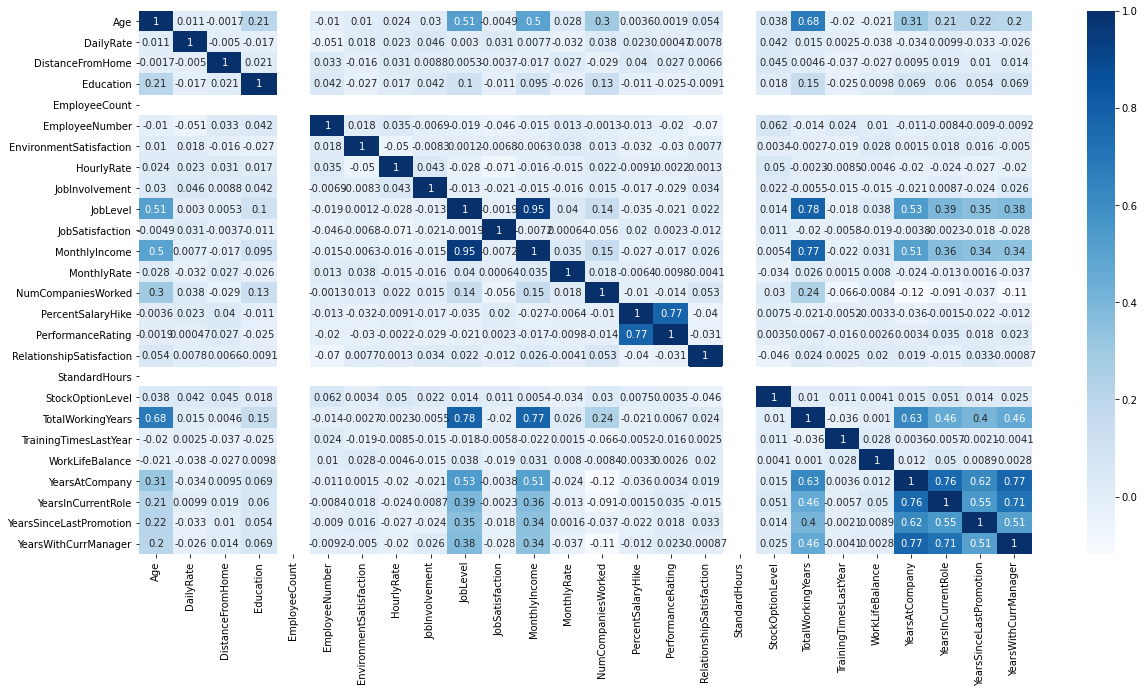

In [16]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

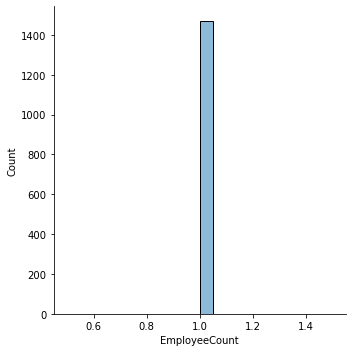

In [17]:
sns.displot(df["EmployeeCount"],bins=20,kde=True)

The above distribution plot for EmployeeCount

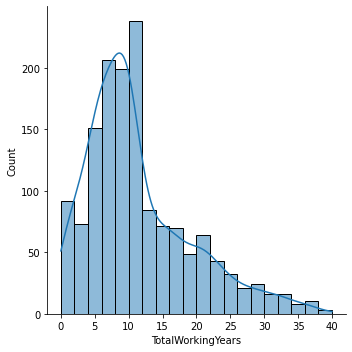

In [18]:
sns.displot(df["TotalWorkingYears"],bins=20,kde=True)

The above distribution plot for TotalWorkingYears

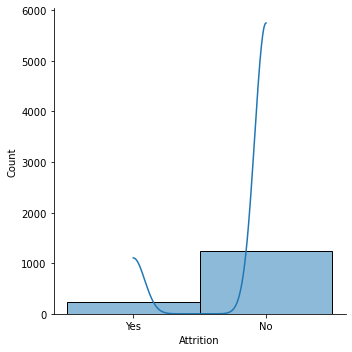

In [19]:
sns.displot(df["Attrition"],bins=20,kde=True)

The above distribution plot for Attrition

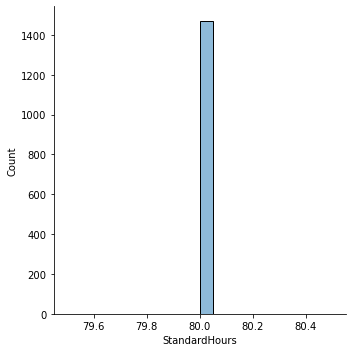

In [20]:
sns.displot(df["StandardHours"],bins=20,kde=True)

The above distribution plot for StandardHours

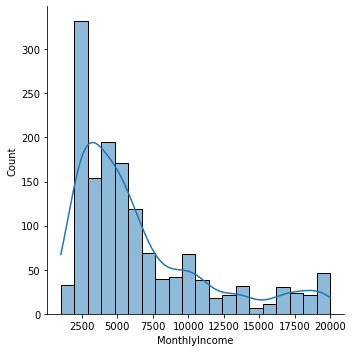

In [21]:
sns.displot(df["MonthlyIncome"],bins=20,kde=True)

The above distribution plot for MonthlyIncome

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


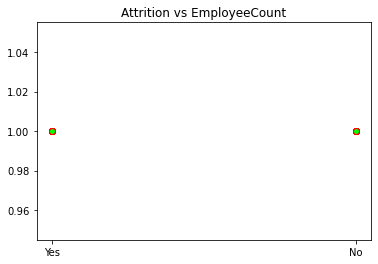

In [22]:
plt.scatter(df["Attrition"],df["EmployeeCount"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("Attrition vs EmployeeCount")
plt.show()

This shows the scatter plot for target variable VS column EmployeeCount. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


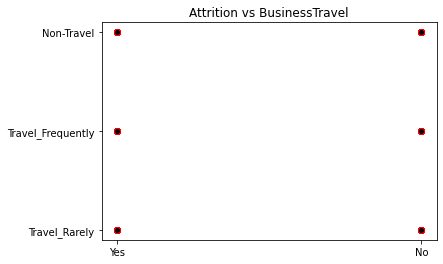

In [23]:
plt.scatter(df["Attrition"],df["BusinessTravel"],alpha=1,c=(0,0,0),edgecolor="r")
plt.title("Attrition vs BusinessTravel")
plt.show()

This shows the scatter plot for target variable VS column BusinessTravel. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


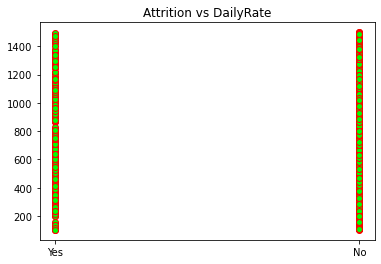

In [24]:
plt.scatter(df["Attrition"],df["DailyRate"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("Attrition vs DailyRate")
plt.show()

This shows the scatter plot for target variable VS column DailyRate. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


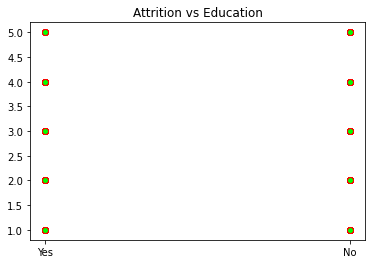

In [25]:
plt.scatter(df["Attrition"],df["Education"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("Attrition vs Education")
plt.show()

This shows the scatter plot for target variable VS column Education. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


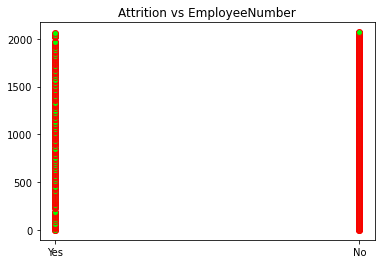

In [26]:
plt.scatter(df["Attrition"],df["EmployeeNumber"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("Attrition vs EmployeeNumber")
plt.show()

This shows the scatter plot for target variable VS column EmployeeNumber. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


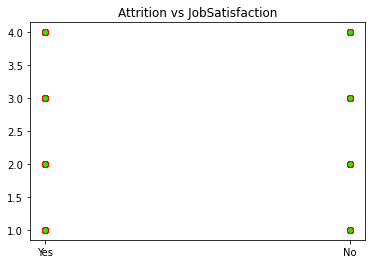

In [27]:
plt.scatter(df["Attrition"],df["JobSatisfaction"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("Attrition vs JobSatisfaction")
plt.show()

This shows the scatter plot for target variable VS column JobSatisfaction. 

In [28]:
sns.pairplot(df,hue="Attrition")

Pair plot with respect to target variable

In [29]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

As we can see the above data has skewness range above +/-0.50. So we have to reduce it within the range

# Ordinal Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
5      32        0.0             1.0       1005         1.0                 2   
6      59        0.0             2.0       1324         1.0                 3   
7      30        0.0             2.0       1358         1.0                24   
8      38        0.0             1.0        216         1.0                23   
9      36        0.0             2.0       1299         1.0                27   
10     35        0.0             2.0        809         1.0                16   
11     29        0.0             2.0        153         1.0                15   
12     31        0.0             2.0        670         1.0                26   
13     34        0.0             2.0       1346         1.0                19   
14     28        1.0             2.0        103         1.0                24   
15     29        0.0             2.0       1389         1.0                21   
16     32        0.0             2.0        334         1.0                 5   
17     22        0.0             0.0       1123         1.0                16   
18     53        0.0             2.0       1219         2.0                 2   
19     38        0.0             2.0        371         1.0                 2   
20     24        0.0             0.0        673         1.0                11   
21     36        1.0             2.0       1218         2.0                 9   
22     34        0.0             2.0        419         1.0                 7   
23     21        0.0             2.0        391         1.0                15   
24     34        1.0             2.0        699         1.0                 6   
25     53        0.0             2.0       1282         1.0                 5   
26     32        1.0             1.0       1125         1.0                16   
27     42        0.0             2.0        691         2.0                 8   
28     44        0.0             2.0        477         1.0                 7   
29     46        0.0             2.0        705         2.0                 2   
30     33        0.0             2.0        924         1.0                 2   
31     44        0.0             2.0       1459         1.0                10   
32     30        0.0             2.0        125         1.0                 9   
33     39        1.0             2.0        895         2.0                 5   
34     24        1.0             2.0        813         1.0                 1   
35     43        0.0             2.0       1273         1.0                 2   
36     50        1.0             2.0        869         2.0                 3   
37     35        0.0             2.0        890         2.0                 2   
38     36        0.0             2.0        852         1.0                 5   
39     33        0.0             1.0       1141         2.0                 1   
40     35        0.0             2.0        464         1.0                 4   
41     27        0.0             2.0       1240         1.0                 2   
42     26        1.0             2.0       1357         1.0                25   
43     27        0.0             1.0        994         2.0                 8   
44     30        0.0             1.0        721         1.0                 1   
45     41        1.0             2.0       1360         1.0                12   
46     34        0.0             0.0       1065         2.0                23   
47     37        0.0             2.0        408         1.0                19   
48     46        0.0             1.0 

Using ordinal encoding we have converted string values to float and integer values in the dataset

In [32]:
df.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

We can see all columns are of integer and float datatype

In [33]:
collist=df.columns.values
ncol=10
nrows=50

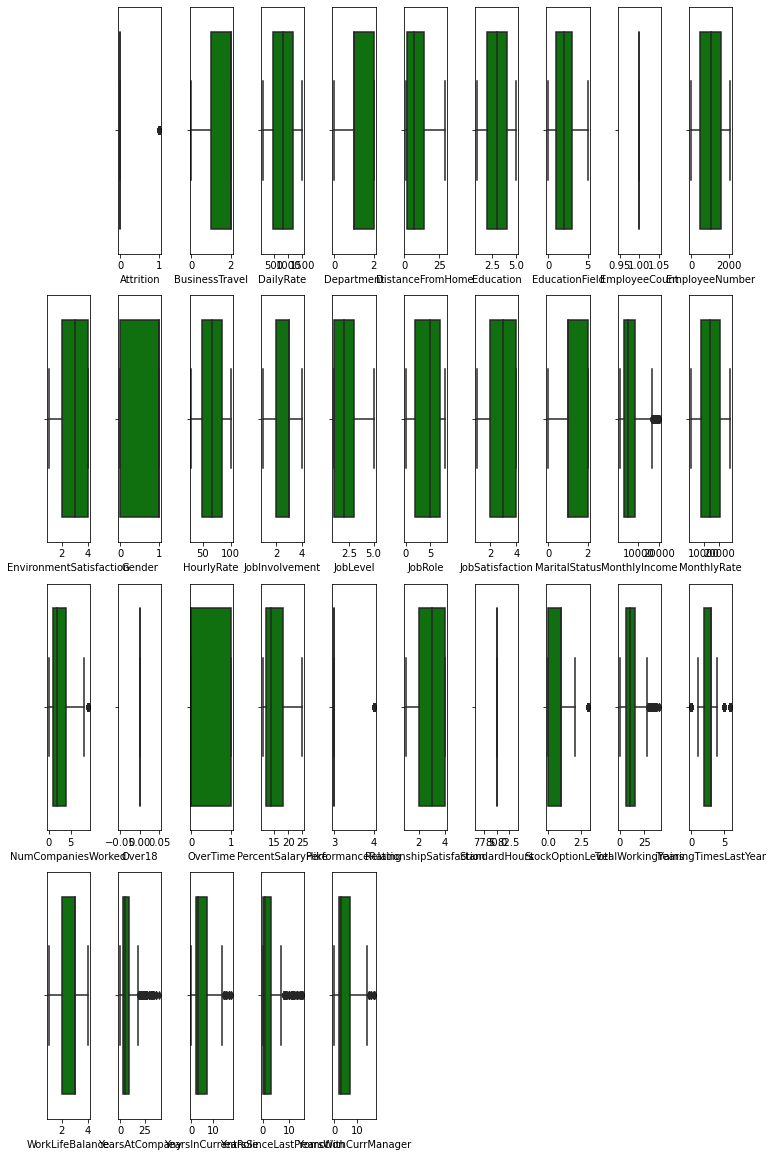

In [34]:
plt.figure(figsize=(ncol,20*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
plt.tight_layout()

Box plot for all columns

In [36]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [37]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
dfcontcols=df[["Age","DailyRate","DistanceFromHome","EmployeeNumber","TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Education","RelationshipSatisfaction","TrainingTimesLastYear","WorkLifeBalance",]]

In [39]:
from scipy.stats import zscore

zscr=np.abs(zscore(dfcontcols))
threshold=3
print(np.where(zscr>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([8, 7, 5, 7, 6, 7, 4, 4, 5, 7, 6, 7, 8, 4, 5, 7, 8, 7, 4, 8, 5, 6,
       7, 6, 8, 5, 7, 4, 5, 6, 7, 7, 8, 4, 5, 5, 7, 7, 4, 6, 5, 5, 7, 5,
       8, 7, 5, 4, 5, 7, 8, 4, 8, 5, 7, 5, 8, 7, 6, 6, 5, 7, 7, 7, 5, 7,
       7, 8, 4, 5, 7, 5, 7, 7

In [40]:
print("shape before removing the outliers",df.shape)
df_new=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new.shape)

shape before removing the outliers (1470, 35)
shape after removing the outliers (1387, 35)


In [41]:
Dataloss=((1470-1387)/1470)*100
Dataloss

5.646258503401361

In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [43]:
print("shape before and after")
print("shape before",":",df.shape)
print("shape after",":",df_new.shape)
print("Percentage loss",":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before : (1470, 35)
shape after : (1387, 35)
Percentage loss : 0.5639455782312925


percentage of data loss in IQR & zscore method is alomst same

In [44]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

# Seperating columns into Independent variables and target variables

In [45]:
x=df_new.drop("Attrition",axis=1)
y=df_new[["Attrition"]]

# Power transformation Method

In [46]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [47]:
df_new2.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EmployeeCount               0.000000
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StandardHours               0.000000
StockOptionLevel            0.089929
T

As now we can all columns are within the skewness range except 2 columns

In [48]:
df_new2.shape

(1387, 34)

As we can see after removing outliers we have 1387rows and 34 columns

In [49]:
sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [50]:
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.610133        0.638730   0.750615    1.379881         -1.489968   
1     1.371830       -1.380776  -1.343372   -0.473500          0.244561   
2     0.182486        0.638730   1.337080   -0.473500         -1.028366   
3    -0.284736       -1.380776   1.377080   -0.473500         -0.698191   
4    -1.080489        0.638730  -0.467301   -0.473500         -1.028366   
5    -0.408717       -1.380776   0.532422   -0.473500         -1.028366   
6     2.191599        0.638730   1.233296   -0.473500         -0.698191   
7    -0.666441        0.638730   1.305407   -0.473500          1.458012   
8     0.292814       -1.380776  -1.545029   -0.473500          1.408969   
9     0.069696        0.638730   1.179985   -0.473500          1.594411   
10   -0.045680        0.638730   0.074957   -0.473500          0.996539   
11   -0.800572        0.638730  -1.761714   -0.473500          0.924375   
12   -0.535890        0.638730  -0.265941   -0.473500          1.550601   
13   -0.163776        0.638730   1.280007   -0.473500          1.190498   
14   -0.938507        0.638730  -1.949678   -0.473500          1.458012   
15   -0.800572        0.638730   1.370773   -0.473500          1.304589   
16   -0.408717        0.638730  -1.176293   -0.473500         -0.229049   
17   -1.861678       -1.842306   0.797226   -0.473500          0.996539   
18    1.714928        0.638730   1.007679    1.379881         -1.028366   
19    0.292814        0.638730  -1.067676   -0.473500         -1.028366   
20   -1.533573       -1.842306  -0.258412   -0.473500          0.583325   
21    0.069696        0.638730   1.005508    1.379881          0.368365   
22   -0.163776        0.638730  -0.930604   -0.473500          0.106520   
23   -2.034798        0.638730  -1.010069   -0.473500          0.924375   
24   -0.163776        0.638730  -0.193500   -0.473500         -0.049519   
25    1.714928        0.638730   1.143592   -0.473500         -0.229049   
26   -0.408717       -1.380776   0.801654   -0.473500          0.996539   
27    0.711684        0.638730  -0.213409    1.379881          0.244561   
28    1.099058        0.638730  -0.178604    1.379881         -1.028366   
29   -0.284736        0.638730   0.346268   -0.473500         -1.028366   
30    0.908982        0.638730   1.517086   -0.473500          0.480623   
31   -0.666441        0.638730  -1.864751   -0.473500          0.368365   
32    0.400794        0.638730   0.278666    1.379881         -0.229049   
33   -1.533573        0.638730   0.084545   -0.473500         -1.489968   
34    0.811273        0.638730   1.124277   -0.473500         -1.028366   
35    1.459705        0.638730   0.217603    1.379881         -0.698191   
36   -0.045680        0.638730   0.266957    1.379881         -1.028366   
37    0.069696        0.638730   0.177437   -0.473500         -0.229049   
38   -0.284736       -1.380776   0.837009    1.379881         -1.489968   
39   -0.045680        0.638730  -0.805535   -0.473500         -0.440553   
40   -1.080489        0.638730   1.053169   -0.473500         -1.028366   
41   -1.226790        0.638730   1.303292   -0.473500          1.505176   
42   -1.080489       -1.380776   0.507363    1.379881          0.244561   
43   -0.666441       -1.380776  -0.139031   -0.473500         -1.489968   
44   -0.163776       -1.842306   0.667961    1.379881          1.408969   
45    0.182486        0.638730  -0.961664   -0.473500          1.190498   
46    1.099058       -1.380776   0.990300    1.379881         -0.229049   
47   -0.045680        0.638730   1.029365   -0.473500          0.244561   
48    1.282468        0.638730  -0.377331   -0.473500         -1.489968   
49   -0.938507        0.638730   1.465032   -0.473500         -0.229049   
50    0.908982        0.638730   1.577197    1.379881         -1.489968   
51   -0.045680       -1.842306   0.739486   -0.473500          0.583325   
52   -1.226790        0.638730   1.4

Using Standard Scaler we have scalled the data

In [51]:
x.shape

(1387, 34)

In [52]:
y.shape

(1387, 1)

# Train test split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1081, 34)
(306, 34)
(1081, 1)
(306, 1)


# Logistic Regression

In [54]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8790849673202614
[[249  13]
 [ 24  20]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       262
         1.0       0.61      0.45      0.52        44

    accuracy                           0.88       306
   macro avg       0.76      0.70      0.73       306
weighted avg       0.87      0.88      0.87       306



Logistic regression accuracy score is 87%

# GaussianNB and its accuracy score

In [55]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score :
0.803921568627451
[[226  36]
 [ 24  20]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       262
         1.0       0.36      0.45      0.40        44

    accuracy                           0.80       306
   macro avg       0.63      0.66      0.64       306
weighted avg       0.83      0.80      0.81       306



# Support vector classifier and its accuracy score

In [56]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.8660130718954249
[[256   6]
 [ 35   9]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       262
         1.0       0.60      0.20      0.31        44

    accuracy                           0.87       306
   macro avg       0.74      0.59      0.62       306
weighted avg       0.84      0.87      0.84       306



# DecisionTreeClassifier and its accuracy score

In [57]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.7516339869281046
[[215  47]
 [ 29  15]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       262
         1.0       0.24      0.34      0.28        44

    accuracy                           0.75       306
   macro avg       0.56      0.58      0.57       306
weighted avg       0.79      0.75      0.77       306



# KNeighborsClassifier and its accuracy score

In [58]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score :
0.8529411764705882
[[258   4]
 [ 41   3]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       262
         1.0       0.43      0.07      0.12        44

    accuracy                           0.85       306
   macro avg       0.65      0.53      0.52       306
weighted avg       0.80      0.85      0.80       306



# Support vector classifier with different kernel

In [59]:
sv=SVC(kernel="poly")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.8594771241830066
[[260   2]
 [ 41   3]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       262
         1.0       0.60      0.07      0.12        44

    accuracy                           0.86       306
   macro avg       0.73      0.53      0.52       306
weighted avg       0.83      0.86      0.81       306



In [60]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.8660130718954249
[[256   6]
 [ 35   9]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       262
         1.0       0.60      0.20      0.31        44

    accuracy                           0.87       306
   macro avg       0.74      0.59      0.62       306
weighted avg       0.84      0.87      0.84       306



# Ensemble Methods using Random forest and Ada booster

In [61]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score :
0.8562091503267973
[[256   6]
 [ 38   6]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       262
         1.0       0.50      0.14      0.21        44

    accuracy                           0.86       306
   macro avg       0.69      0.56      0.57       306
weighted avg       0.82      0.86      0.82       306



In [62]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

accuracy score :
0.8660130718954249
[[249  13]
 [ 28  16]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       262
         1.0       0.55      0.36      0.44        44

    accuracy                           0.87       306
   macro avg       0.73      0.66      0.68       306
weighted avg       0.85      0.87      0.85       306



In [63]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

Attrition
1.0          1158
0.0          1158
dtype: int64

We can see now the target variable is equally distributed

# Cross validation method

In [65]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.87410072 0.8705036  0.85920578 0.8700361  0.87725632]
0.8702205022985222


In [66]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.8705036  0.85611511 0.87364621 0.86281588 0.87364621]
0.8673454016570137


In [67]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.76618705 0.80935252 0.79061372 0.77256318 0.75090253]
0.7779237981455991


In [68]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.85611511 0.8381295  0.84115523 0.85559567 0.84476534]
0.8471521699607824


In [69]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.85251799 0.85611511 0.85198556 0.85559567 0.85198556]
0.8536399761057579


In [70]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.83453237 0.86690647 0.83754513 0.85920578 0.85198556]
0.8500350622029451


# Saving the best model accuracy

In [71]:
import pickle
filename="HR Attrition.pkl"
pickle.dump(lg,open(filename,"wb"))

# Conclusion

In [72]:
loaded_model=pickle.load(open("HR Attrition.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.8790849673202614
